## OR GATE PERCEPTRON

In this notebook we will implement a perceptron for the OR GATE.

Remember the `OR` gate works as follows:

| X1    | X2       | Out  |
| :-----: |:--------:| :----:|
|   0   |    0     |   0  |
|   0   |    1     |   1  |
|   1   |    0     |   1  |
|   1   |    1     |   1  |

And the corresponding perceptron is:

![Image](https://marcomilanesio.github.io/material/30.11/perceptron.png)

### Assign random weigths and calculate output

Let's assign the following weights at random: 
  * $w_1 = 0.2$
  * $w_2 = 0.3$
  * $w_3 = 0.5$
  
Let's assume:
  * $x_1 = 0$
  * $x_2 = 1$
  
Then we can compute:

#### input for $o_1$

\begin{align}
o_1 & = w_1 * x_1 + w_2 * x_2 + w3 * b \\
    & = 0.3 + 0.5 \\
    & = 0.8
\end{align}


#### output value (using the `sigmoid` function):

\begin{align}
out & = \frac{1}{1 + e^{-X}} = \frac{1}{1 + e^{-0.8}} = 0.68997
\end{align}

#### error (MSE):

\begin{align}
MSE & = \sum_{i} \frac{1}{2} * (target - output)^2
\end{align}

In $o_1$:

\begin{align}
err & = \frac{1}{2} * (1 - 0.68997)^2 = 0.048059
\end{align}


We need to calculate this for all possible inputs, and then calculate the global MSE.

After this, we can update the weights.
So,

## Gradient Descent

\begin{align}
X & = X - lr * \frac{\partial}{\partial X} f(X)
\end{align}

Where:
  * $X$ is the input
  * $lr$ is the learning rate
  * $f(X)$ is the output
  
### Derivation

#### N.1: how a particular weight $w$ influence the error $err$?

\begin{align}
\frac{\partial err}{\partial w}
\end{align}


Let's apply [Chain Rule](https://en.wikipedia.org/wiki/Chain_rule).

\begin{align}
\frac{\partial err}{\partial w} = \frac{\partial err}{\partial out} * \frac{\partial out}{\partial in} * \frac{\partial in}{\partial w}
\end{align}

Where (I'll skip the derivation, if [interested](https://towardsdatascience.com/derivative-of-the-sigmoid-function-536880cf918e))

  * $\frac{\partial err}{\partial out} = (output - target)$
  * $\frac{\partial out}{\partial in} = output * (1 - output)$
  * $\frac{\partial in}{\partial w} = input$

And remember:
  * $input = w_1 * x_1 + w_2 * x_2 + w_3 * b$
  * $output = \frac{1}{1 + e^{-input}}$
  * $MSE = \sum \frac{1}{2} (target - output)^2$
  * Gradient Descent $w = w - lr * \frac{\partial err}{\partial w}$
  
  


In [1]:
import numpy as np
input_features = np.array([[0,0], [0,1], [1,0],[1,1]])

In [2]:
input_features

array([[0, 0],
       [0, 1],
       [1, 0],
       [1, 1]])

In [3]:
target_output = np.array([0,1,1,1])
target_output = target_output.reshape(4,1)

In [24]:
target_output

array([[0],
       [1],
       [1],
       [1]])

In [5]:
weigths = np.array([[0.1], [0.2]])

In [6]:
input_features.shape

(4, 2)

In [7]:
target_output.shape

(4, 1)

In [8]:
weigths.shape

(2, 1)

In [9]:
bias = 0.3
lr = 0.05  # you cannot learn this! try and see

In [10]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return sigmoid(x) * (1 - sigmoid(x))

In [22]:
for epoch in range(10000):
    inputs = input_features       
    in_o = np.dot(inputs, weigths) + bias  # FF input
    out_o = sigmoid(in_o)    # FF output
    error = out_o - target_output
    
    x = error.sum()
    if epoch % 1000 == 0:
        print(f'{epoch} --> Error: {x}')
        print(derr_dout.shape, dout_din.shape)
   
    derr_dout = error
    dout_din = sigmoid_derivative(out_o)   # 1st derivative
    deriv = derr_dout * dout_din
    
    inputs = input_features.T
    deriv_final = np.dot(inputs, deriv)    # what we need
    
    # Back propagation
    # gradient descent 
    weigths -= lr * deriv_final    # update weigths for input
    
    for i in deriv:
        bias -= lr * i
    

0 --> Error: -0.0002155219300596367
(4, 1) (4, 1)
1000 --> Error: -0.000211560888877374
(4, 1) (4, 1)
2000 --> Error: -0.0002073905455205194
(4, 1) (4, 1)
3000 --> Error: -0.000203111098083502
(4, 1) (4, 1)
4000 --> Error: -0.00019879420137066534
(4, 1) (4, 1)
5000 --> Error: -0.00019449097483311556
(4, 1) (4, 1)
6000 --> Error: -0.00019023764890227501
(4, 1) (4, 1)
7000 --> Error: -0.00018605959064017102
(4, 1) (4, 1)
8000 --> Error: -0.00018197420246779915
(4, 1) (4, 1)
9000 --> Error: -0.00017799302790322095
(4, 1) (4, 1)


In [12]:
bias

array([-3.14905135])

In [13]:
weigths

array([[7.00922425],
       [7.00953281]])

In [14]:
point = np.array([0,0])  # expected = 0
res1 = np.dot(point, weigths) + bias
res2 = sigmoid(res1)
res2

array([0.04112867])

In [15]:
point = np.array([1,0])  # expected = 1
res1 = np.dot(point, weigths) + bias
res2 = sigmoid(res1)
res2

array([0.9793702])

In [16]:
point = np.array([1,1])  # expected = 1
res1 = np.dot(point, weigths) + bias
res2 = sigmoid(res1)
res2

array([0.99998097])

In [17]:
import matplotlib.pyplot as plt
%matplotlib inline

In [18]:
test_input = np.linspace(-10, 10, 100)

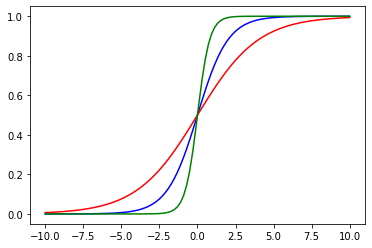

In [19]:
plt.plot(test_input, sigmoid(test_input), c='b')
plt.plot(test_input, sigmoid(test_input*0.5), c='r')
plt.plot(test_input, sigmoid(test_input*2.5), c='g')

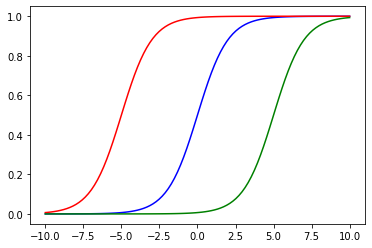

In [20]:
plt.plot(test_input, sigmoid(test_input), c='b')
plt.plot(test_input, sigmoid(test_input + 5), c='r')
plt.plot(test_input, sigmoid(test_input - 5), c='g')